Algorithm

In [58]:
!pip install python-igraph
!pip install pandas

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import math
import operator
import igraph
import mpl_toolkits.mplot3d
import pandas as pd

In [60]:
#We are going to randomnly generate the vertices, so we need a function to get the distances between each and all of them
def generate_edges_from_vertices(vertices):
    length = len(vertices)
    edges = list()

    for k,v in vertices.items():
        for k2,v2 in {n:m for n,m in vertices.items() if n > k }.items():
            edges.append(((k, k2), get_dist(vertices.get(k), vertices.get(k2))))

    return edges

In [61]:
#arbitrary dimension euclidean distance
def get_dist(a, b):
    return math.sqrt(sum([(a[x]-b[x])**2 for x in range(len(a))]))

In [62]:
#Kruskal's algorithm
def kruskal(vertices, edges):
    final_edges = []
    sorted_edges = sorted(edges, key=operator.itemgetter(1))
    current_trees = [set([k]) for k in vertices.keys()]

    while len(current_trees) > 1:
        next_edge = sorted_edges.pop(0)
        current_vertices = next_edge[0]

        p1, p2 = current_vertices[0],current_vertices[1]

        valid = True
        for tree in current_trees:
            if (p1 in tree) and (p2 in tree):
                valid = False
                break

        if valid:
            set_a = None
            set_b = None

            final_edges.append(next_edge[0])

            for tree in current_trees:
                if (p1 in tree):
                    set_a = tree
                if (p2 in tree):
                    set_b = tree

            new_set = set_a.union(set_b)

            current_trees.remove(set_a)
            current_trees.remove(set_b)
            current_trees.append(new_set)

    return final_edges

In [63]:
#helper func for plotting edge lists
def plot_edges(edge_list, vertices, dimensions, ax):
    for origin, dest in edge_list:
        origin_coords = vertices[origin]
        dest_coords = vertices[dest]
        ax.plot(*[[origin_coords[x], dest_coords[x]] for x in range(dimensions)], marker='o')

In [64]:
# Function to print connections in the minimum spanning tree
def print_connections(edge_list):
    print("Connections in the Minimum Spanning Tree:")
    for connection in edge_list:
        print(f"{connection[0]} - {connection[1]}")

2D

In [65]:
# We are going to read the vertices from a CSV file
csv_file_path = "/content/dataset2d.csv"

def read_vertices_from_csv(file_path):
    df = pd.read_csv(file_path)
    vertices = dict(enumerate(df.values))
    return vertices

In [66]:
# Go! 2 dimensions
dimensions = 2
vertices = read_vertices_from_csv(csv_file_path)
edges = generate_edges_from_vertices(vertices)

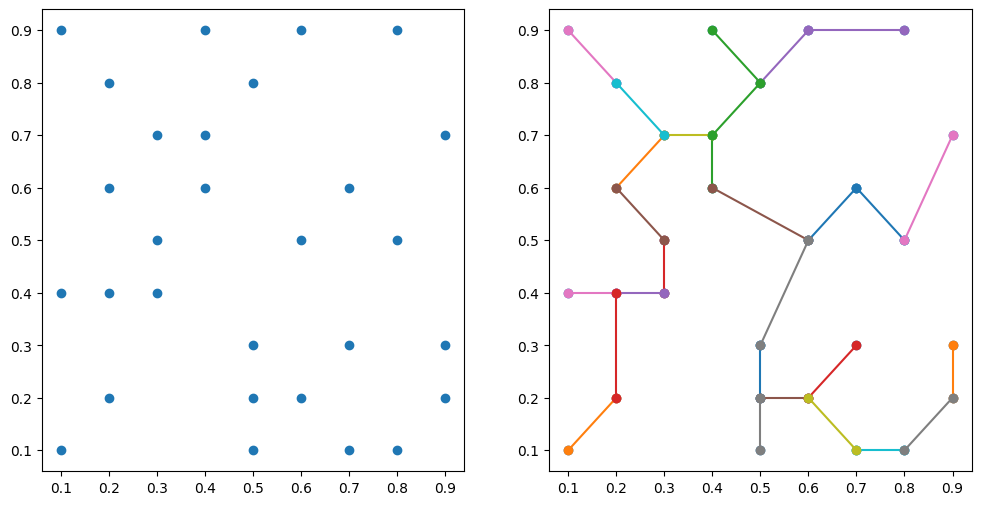

In [67]:
# Plotting the two-dimensional result
edge_list = kruskal(vertices, edges)

fig = plt.figure(figsize=(12, 6))

# First subplot: scatter plot of vertices
ax1 = fig.add_subplot(121)
ax1.scatter([v[0] for v in vertices.values()], [v[1] for v in vertices.values()])

# Second subplot: plot the edges
ax2 = fig.add_subplot(122)
plot_edges(edge_list, vertices, dimensions, ax2)

ax2.scatter([v[0] for v in vertices.values()], [v[1] for v in vertices.values()])

fig.show()

In [68]:
# Print connections
print_connections(edge_list)

Connections in the Minimum Spanning Tree:
1 - 20
4 - 22
12 - 23
15 - 26
15 - 28
20 - 25
3 - 28
20 - 27
5 - 23
7 - 18
2 - 6
5 - 19
8 - 11
10 - 25
11 - 16
19 - 26
0 - 21
4 - 7
18 - 25
0 - 5
2 - 17
9 - 13
11 - 23
9 - 28
16 - 24
6 - 12
14 - 17
1 - 6


3D

In [69]:
# We are going to read the vertices from a CSV file
csv_file_path = "/content/dataset3d.csv"

def read_vertices_from_csv(file_path):
    df = pd.read_csv(file_path)
    vertices = dict(enumerate(df.values))
    return vertices

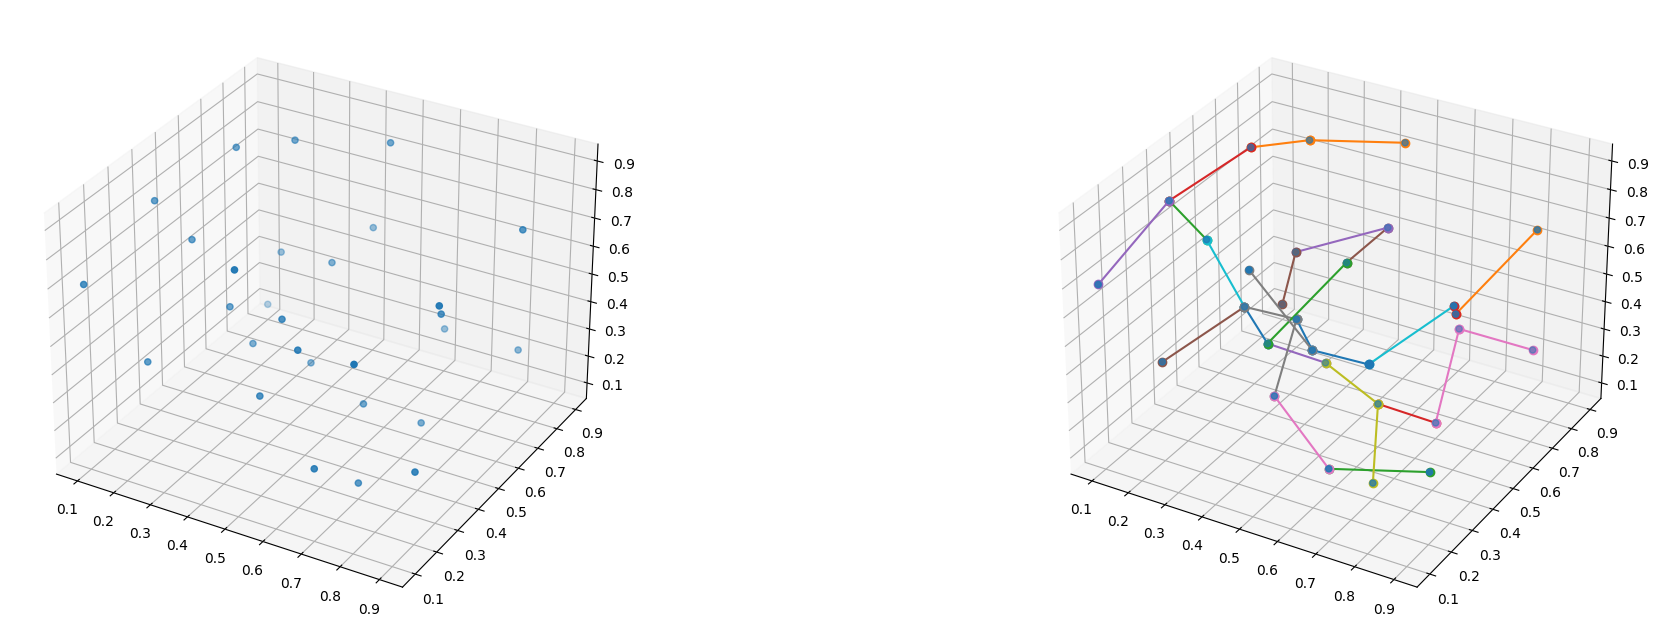

In [70]:
# Go! 3 dimensions
dimensions = 3
vertices = read_vertices_from_csv(csv_file_path)
edges = generate_edges_from_vertices(vertices)

fig = plt.figure(figsize=(24, 8))

# Scatter plot without edges
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter([v[0] for v in vertices.values()], [v[1] for v in vertices.values()], [v[2] for v in vertices.values()])

# Get the minimum spanning tree edges
edge_list = kruskal(vertices, edges)

ax2 = fig.add_subplot(122, projection='3d')
plot_edges(edge_list, vertices, dimensions, ax2)

ax2.scatter([v[0] for v in vertices.values()], [v[1] for v in vertices.values()], [v[2] for v in vertices.values()])

fig.show()


In [71]:
# Print connections
print_connections(edge_list)

Connections in the Minimum Spanning Tree:
1 - 25
5 - 19
3 - 28
2 - 6
12 - 26
8 - 23
16 - 24
1 - 20
6 - 12
15 - 28
15 - 26
5 - 11
4 - 18
3 - 19
0 - 8
9 - 15
18 - 20
1 - 15
6 - 10
7 - 22
7 - 25
14 - 17
23 - 26
17 - 22
3 - 13
0 - 21
2 - 16
25 - 27
